<a href="https://colab.research.google.com/github/m-mehabadi/grad-maker/blob/main/notebooks/Testing_GradientMaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/dual-ascent.pdf

https://web.stanford.edu/class/ee364b/lectures/primal_dual_subgrad_slides.pdf

https://www.cvxpy.org/examples/basic/quadratic_program.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [22]:
def gmaker(grads, epochs = 100, method="simple"):
    lr = 0.01
    n, d = grads.shape
    w = np.random.randn(d)
    max_count = 0
    for e in range(epochs):
        ge = grads[e%n]
        w_new = w + lr * (1. - (ge@w >= 0)) * ge
        # w = w_new/np.linalg.norm(w_new)
        w = w_new if method=="simple" else w_new/np.linalg.norm(w_new)
        pos_count = np.sum(grads@w>=0)
        max_count = pos_count if pos_count >= max_count else max_count
        # if pos_count >= max_count:
        #     max_count = pos_count
    print(f"{pos_count} out of {n}, and maximum of {max_count}")
    return w, (pos_count, max_count)

### Testcases

Now let's write some test cases to make sure everything is working correctly


In [3]:
shape = (2000, 7840)
grads = 1e-10*(1000*(np.random.randn(*shape)+1))*np.random.randn(*shape)

967 out of 2000, and maximum of 967
998 out of 2000, and maximum of 998
977 out of 2000, and maximum of 977
979 out of 2000, and maximum of 979


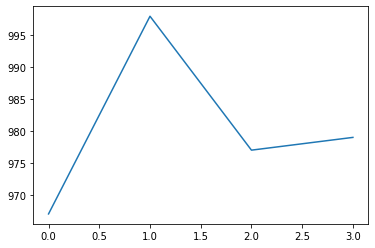

In [23]:
epochs_power = 4
counts = []
for i in [10**j for j in range(epochs_power)]:
    g, (pos_count, _) = gmaker(grads, epochs=i)
    counts.append(pos_count)
plt.plot(list(range(epochs_power)), counts)